
# Credit Card Sales Prediction

The dataset is gathered from a hackathon. The dataset has 10 feature columns and a target label. This is a binary classification problem. We need to predict whether the customer is willing to purchase the credit card or not. 

 The main objective of this analysis and modelling is to find the best model for predicting the lead for credit card.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import os
import time


from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()
os.chdir("..")

In [3]:
import sys

#full_path = os.path.expand
train = pd.read_csv("Av_hackathon2/train.csv")
test = pd.read_csv("Av_hackathon2/test.csv")

# Details of few important features:

**ID**: a number to identify the person.

**Region_code**: code name of the region for company purpose.

**Channel_code**: domain-specific (X1,X2,X3,X4)

**Vintage**: domain-specific ratings based on income

**credit-product**: Did he took any kind of loan? (Yes or No)

**Is-active**: Is he actively making transactions? (yes or no)

0    187437
1     58288
Name: Is_Lead, dtype: int64

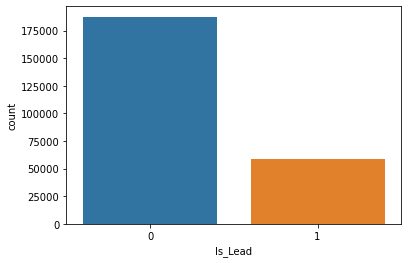

In [4]:
sns.countplot(train['Is_Lead'])
train['Is_Lead'].value_counts()

# Preprocessing 

In [5]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
train['Credit_Product'] = train['Credit_Product'].replace(np.nan, 'No')

In [7]:
#the above code also be done with the following simple code.

df_uniques = pd.DataFrame([[i, len(train[i].unique())] for i in train.columns],
                          columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
ID,245725
Gender,2
Age,63
Region_Code,35
Occupation,4
Channel_Code,4
Vintage,66
Credit_Product,2
Avg_Account_Balance,135292


In [8]:
binary_variables = list(df_uniques[df_uniques['Unique Values']== 2].index)
categorical_variables = list(df_uniques[ (6>= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)

ordinal_variables = ['ID', 'Age', 'Region_Code', 'Vintage']
#picked the ordinal variables by common sense.

numeric_variables = list(set(train.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

In [9]:
print(binary_variables,'\n')
print(numeric_variables,'\n')
print(categorical_variables)

['Gender', 'Credit_Product', 'Is_Active', 'Is_Lead'] 

['Avg_Account_Balance'] 

['Occupation', 'Channel_Code']


In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, OrdinalEncoder

lb, le = LabelBinarizer(), LabelEncoder()

for column in ordinal_variables:
    train[column] = le.fit_transform(train[column])

for column in binary_variables:
    train[column] = lb.fit_transform(train[column])
    
train = pd.get_dummies(train, columns = categorical_variables, drop_first=True)

In [11]:
#since the avg account balance is skewed let's boxcox it.
from scipy.stats import boxcox 

train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])

In [12]:
train['Avg_Account_Balance'].head(20)

0     13.860193
1     13.274205
2     14.210464
3     13.061453
4     13.695360
5     13.207004
6     13.870709
7     13.005209
8     14.057895
9     14.515752
10    13.795985
11    13.127922
12    13.606752
13    13.752309
14    13.631810
15    13.155920
16    14.640783
17    14.684581
18    12.741317
19    13.358990
Name: Avg_Account_Balance, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
for column in [ordinal_variables + numeric_variables]:
    train[column] = mm.fit_transform(train[column])

In [14]:
train['Avg_Account_Balance'].head(5)

0    0.630865
1    0.536510
2    0.687265
3    0.502253
4    0.604324
Name: Avg_Account_Balance, dtype: float64

<AxesSubplot:>

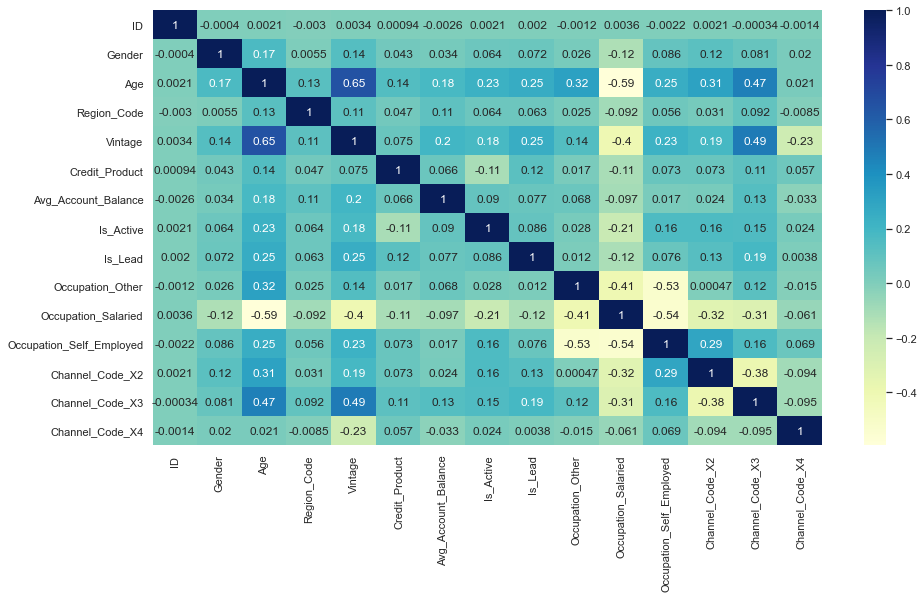

In [15]:
#fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(train.corr(method ="spearman"), cmap="YlGnBu", annot=True)

**Dropping few features which are less correlated and splitting using stratifiedshufflesplit**

In [16]:
train = train.drop('ID', axis = 1)

In [17]:
y, X = train['Is_Lead'], train.drop(columns=['Is_Lead'])
#we are dropping ID because the correlation is the least. The channel_code_x4 whose corr is removed earlier due to same.

target = 'Is_Lead'

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, shuffle=True)

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit


feature_cols = [x for x in train.columns if x != target]


# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(train[feature_cols], train[target]))

# Create the data sets
X_train = train.loc[train_idx, feature_cols]
y_train = train.loc[train_idx, target]

X_test = train.loc[test_idx, feature_cols]
y_test = train.loc[test_idx, target]

In [20]:
X_train

,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
75880,1,0.258065,0.529412,0.492308,0,0.769031,0,1,0,0,0,0,0
3536,1,0.112903,0.117647,0.046154,0,0.620769,1,0,1,0,0,0,0
26300,0,0.580645,0.794118,0.953846,1,0.588295,0,0,0,1,0,1,0
228409,1,0.338710,0.970588,0.123077,0,0.728763,0,0,0,1,0,1,0
725,1,0.467742,0.117647,0.076923,0,0.521198,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150898,0,0.064516,0.705882,0.107692,0,0.611915,0,0,1,0,0,0,0
237369,1,0.419355,0.117647,0.338462,1,0.500889,0,0,0,1,1,0,0
69566,1,0.338710,0.529412,0.738462,0,0.690638,0,0,0,1,0,1,0
220533,1,0.032258,0.029412,0.092308,0,0.624606,1,0,1,0,0,0,0


# Upsampling and Downsampling

In [21]:
X1, X2, y1, y2 = train_test_split(X,y, test_size= 0.2, shuffle=True)

In [22]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from collections import Counter



from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import RandomUnderSampler



In [23]:
#scaler = StandardScaler()
from imblearn.pipeline import Pipeline

over = BorderlineSMOTE(sampling_strategy = 'auto')

under = RandomUnderSampler(sampling_strategy= 'auto')


steps = [("o", over), ("u", under)]

pipeline = Pipeline(steps=steps)


# transform the dataset
x_sm_us, y_sm_us = pipeline.fit_resample(X1, y1)

print(Counter(y1))
print(Counter(y_sm_us))

Counter({0: 150006, 1: 46574})
Counter({0: 150006, 1: 150006})


In [24]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_sm_us,y_sm_us, test_size= 0.2, random_state=143)

In [25]:
from imblearn.combine import SMOTETomek

smt = SMOTE(sampling_strategy='auto', k_neighbors=7)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_smt))

Counter({0: 149950, 1: 46630})
Counter({0: 149950, 1: 149950})


In [26]:
#checked with n_estimators with different numbers from 15 to 400, not much significance.
#X_test

# ML Models to the Rescue

In [27]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV


from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline

In [28]:
#basic models first.

In [29]:
#logistic regresssion
#trans = PolynomialFeatures(degree=3)
model = XGBClassifier()
#pipe = Pipeline(steps=[('t', trans), ('m', model)])

model.fit(X_train_new,y_train_new)
y_pred = model.predict(X_test_new)

[15:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
print(x_sm_us.shape)
print(X_test.shape)

(300012, 13)
(49145, 13)


In [31]:
print(metrics.confusion_matrix(y_test_new, y_pred))

print(metrics.classification_report(y_test_new,y_pred))

[[27617  2508]
 [ 6289 23589]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     30125
           1       0.90      0.79      0.84     29878

    accuracy                           0.85     60003
   macro avg       0.86      0.85      0.85     60003
weighted avg       0.86      0.85      0.85     60003



In [32]:
metrics.roc_auc_score(y_test_new,y_pred)

0.8531287823594652

In [33]:
y_test_new

153043    1
129058    0
35496     0
82080     0
86673     0
         ..
219838    1
248450    1
115729    0
186729    1
126446    0
Name: Is_Lead, Length: 60003, dtype: int32

In [34]:
#X2 and y2 now. 

y_pred2 = model.predict(X2)

In [35]:
print(metrics.classification_report(y2,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87     37431
           1       0.57      0.36      0.44     11714

    accuracy                           0.78     49145
   macro avg       0.70      0.64      0.65     49145
weighted avg       0.76      0.78      0.77     49145



In [36]:
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [37]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

pipeline.fit(X_train,y_train)

Pipeline(steps=[('t', PolynomialFeatures(degree=3)),
                ('m', KNeighborsClassifier())])

# 1. XGBoost

**Using xgb directly on x-train and y-train now. then will apply on training data that we got from sampling to xgb2.**

In [38]:
xgb = XGBClassifier(max_depth = 9, learning_rate = 0.1)

xgb.fit(X_train, y_train)

[15:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
score = metrics.roc_auc_score(y_test, xgb.predict(X_test))
matrix= metrics.confusion_matrix(y_test,xgb.predict(X_test))
print(score)
print(matrix)

0.6161173146760643
[[35575  1912]
 [ 8356  3302]]


In [40]:
xgb2 = XGBClassifier( max_depth = 9, learning_rate= 0.1, random_state=40)
#the max-depth and learning rate is taken after some grid searches.
xgb2.fit(x_sm_us, y_sm_us)

[15:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=40,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
score = metrics.roc_auc_score(y_train, xgb2.predict(X_train))
matrix2= metrics.confusion_matrix(y_test,xgb2.predict(X_test))

print(score)
print(matrix2)

0.6991702431084148
[[32132  5355]
 [ 5397  6261]]


**there is a significant improvement in the roc-score and recall with the sampling.**

In [42]:
#random search cv

params = {
          "learning_rate": [0.05, 0.1,0.2, 0.3],
          "max_depth": [3,6, 9, 12],
          "min_child_weight": [1, 3, 5, 7, 9],
          "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
          "colsample_bytree": [0.3,0.4, 0.5, 0.6]
}

In [43]:
from sklearn.model_selection import RandomizedSearchCV

clf = XGBClassifier()

randomsearch = RandomizedSearchCV(clf, params, n_iter=5, cv= 4, scoring='roc_auc', n_jobs= -1)

In [44]:
#randomsearch.fit(X,y)

# 2. Random Forest

In [45]:
model2 = RandomForestClassifier( n_estimators = 150, max_depth = 6, 
                                class_weight = "balanced_subsample", random_state=30, warm_start= True)

model2.fit(X_train_new,y_train_new)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       n_estimators=150, random_state=30, warm_start=True)

In [46]:
score_train = metrics.roc_auc_score(y_train,model2.predict(X_train))
score_test = metrics.roc_auc_score(y_test, model2.predict(X_test))

matrix2= metrics.confusion_matrix(y_test,model2.predict(X_test))

print(matrix2)

print(score_train, score_test)


[[21634 15853]
 [ 2147  9511]]
0.6995577945525769 0.6964706751683065


In [47]:

RF = RandomForestClassifier()
 
Parameter_Trials={'n_estimators':[100,300,500],
                  'max_depth': [3,6,9],
                  'max_features': ["auto", "sqrt", "log2", None],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1,2, 4,6, 8]} 
 
random_search_RF = RandomizedSearchCV(RF, Parameter_Trials,n_iter=5, cv= 4, scoring='roc_auc', n_jobs=-1, verbose=5)


In [48]:
#random_search_RF.fit(X_train,y_train)

In [49]:
new_params = {'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None,
 'max_depth': 9}

# 3. SVM

In [50]:

kwargs = {'kernel': 'rbf'}

ny_model = Nystroem(**kwargs)

sgd  = SGDClassifier(penalty = 'elasticnet')
#svc_guassian = SVC(kernel='rbf', gamma=5)

#svc_guassian.fit(X_train,y_train) 

In [51]:
X_train_transf = ny_model.fit_transform(X_train)
sgd.fit(X_train_transf, y_train)

SGDClassifier(penalty='elasticnet')

In [52]:
X_train_transf.shape

(196580, 100)

In [53]:
y_train

75880     0
3536      0
26300     1
228409    1
725       0
         ..
150898    0
237369    0
69566     1
220533    0
31356     0
Name: Is_Lead, Length: 196580, dtype: int32

In [54]:
#ny_model2 = Nystroem(**kwargs)
X_test_transf = ny_model.transform(X_test)
score = metrics.roc_auc_score(y_test, sgd.predict(X_test_transf))
print(score)

0.5433226722119617


In [55]:
metrics.confusion_matrix(y_test, sgd.predict(X_test_transf))

array([[37124,   363],
       [10535,  1123]], dtype=int64)

In [56]:
X_test_transf.shape

(49145, 100)

In [57]:
#score = metrics.roc_auc_score(y_test, svc_guassian.predict(X_test))
#print(score)

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=1234)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1234)

In [59]:
rf_clf.feature_importances_

array([0.01295755, 0.21219986, 0.13499162, 0.21646609, 0.01607057,
       0.31134713, 0.01650891, 0.01032878, 0.02266812, 0.00962769,
       0.01814347, 0.01635454, 0.00233567])

In [60]:
feature_names = list(X_train.columns)

In [61]:
feature_names

['Gender',
 'Age',
 'Region_Code',
 'Vintage',
 'Credit_Product',
 'Avg_Account_Balance',
 'Is_Active',
 'Occupation_Other',
 'Occupation_Salaried',
 'Occupation_Self_Employed',
 'Channel_Code_X2',
 'Channel_Code_X3',
 'Channel_Code_X4']

In [62]:

features_to_plot = 10

importances = rf_clf.feature_importances_
indices = np.argsort(importances)

best_vars = np.array(feature_names)[indices][-features_to_plot:]
values = importances[indices][-features_to_plot:]
best_vars

array(['Gender', 'Credit_Product', 'Channel_Code_X3', 'Is_Active',
       'Channel_Code_X2', 'Occupation_Salaried', 'Region_Code', 'Age',
       'Vintage', 'Avg_Account_Balance'], dtype='<U24')

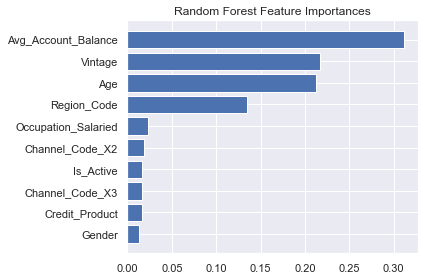

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

y_ticks = np.arange(0, features_to_plot)
fig, ax = plt.subplots()
ax.barh(y_ticks, values)
ax.set_yticklabels(best_vars)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()

In [68]:
imp_features = ['Avg_Account_Balance', 'Vintage', 'Age', 'Region_Code']

X_train_new = X_train[imp_features]

X_test_new = X_test[imp_features]


In [69]:
xgb_new = XGBClassifier(min_child_weight= 3,
                        max_depth = 12,
                        learning_rate= 0.2,
                        gamma= 0.0,
                        colsample_bytree= 0.6)


xgb_new.fit(X_train_new,y_train)

[15:52:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
#score_train = metrics.roc_auc_score(y_train,new_clf.predict(X_train))
score_test = metrics.roc_auc_score(y_test, xgb_new.predict(X_test_new))

#matrix2= metrics.confusion_matrix(y_test,xgb_new.predict(X_test))

#print(matrix2)


print(score_test)

0.5684022843021563


***Note that by just keeping only few important features and predicting over it will overfit mostly and give less test scores***


**The best scores are achieved only through XGboost of "0.85" with the help of random search and smote. Further analysis would be better to go with XGB.**

In [71]:
train['id'] = np.arange(train.shape[0])

In [72]:
train.head()

,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,id
0,0,0.806452,0.529412,0.276923,0,0.630865,0,0,1,0,0,0,1,0,0
1,0,0.112903,0.794118,0.200000,0,0.536510,0,0,0,1,0,0,0,0,1
2,0,0.532258,0.529412,0.153846,0,0.687265,1,0,0,0,1,0,1,0,2
3,1,0.177419,0.588235,0.092308,0,0.502253,0,0,0,1,0,0,0,0,3
4,0,0.112903,0.941176,0.215385,0,0.604324,0,0,0,1,0,0,0,0,4


In [82]:
import featuretools as ft

es = ft.EntitySet(id = 'predict')

es.entity_from_dataframe(entity_id = 'x', dataframe = train, index = 'id')

es.normalize_entity(base_entity_id = 'x', new_entity_id = 'y', index = 'Is_Lead', additional_variables = ['Avg_Account_Balance', 'Vintage', 'Age', 'Region_Code'])

Entityset: predict
  Entities:
    x [Rows: 245725, Columns: 11]
    y [Rows: 2, Columns: 5]
  Relationships:
    x.Is_Lead -> y.Is_Lead

In [1]:

#feature_matrix, feature_names = ft.dfs(entityset=es, 
#target_entity = 'x', max_depth = 1, 
#verbose = 1, n_jobs = 3)

In [ ]:
#es.plot()

In [ ]:
#feature_matrix.columns
#y, X = feature_matrix['Is_Lead'], feature_matrix.drop('Is_Lead', axis=1)

NameError: name 'feature_matrix' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=143)

In [ ]:
xgb = XGBClassifier(max_depth = 9, learning_rate = 0.1)

xgb.fit(X_train, y_train)

In [ ]:
score = metrics.roc_auc_score(y_test, xgb.predict(X_test))
matrix= metrics.confusion_matrix(y_test,xgb.predict(X_test))
print(score)
print(matrix)

In [ ]:
print(metrics.classification_report(y_test, xgb.predict(X_test)))

In [ ]:
y_pred = xgb.predict(X_test)

# Conclusion:
 The Highest ROC score achieved is by XGB using Smote_random_sampler i.e., 0.856

# Insights

- With the increase in the complexity of the model, the model tried to overfit the data. The case seen in Sgd and SVC.
- Randomized search provided almost similar hyperparameters with less time compared to Grid search.
- The Random forest performed the least among the three.

# Further Study

- Need to tune the model by selecting only the most important features and then doing the same process as above.
- Also doing some Stacking models can improve the score further.
- using neural networks to find best parameters can also improve the performance.